<a href="https://colab.research.google.com/github/pazz09/ADA-Informes/blob/main/OPTIMAL_BST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- **DESCRIPCIÓN DEL PROBLEMA**  :


Entrada: Secuencia ordenada de n claves (A = [a1,a2,a3...ax]) y su frecuencia  (F = [f1,f2,f3...fx]), F es el número de búsquedas de las claves.

Salida: Un árbol que minimice la cantidad esperada de nodos visitados (costo esperado).

n = Tamaño del problema.






----------------------------------------------------------


2- **ALGORITMO A UTILIZAR**:

**Arbol binario de busqueda óptimo**

Busca organizar según su frecuencia de aparicion los datos de manera que se minimice la cantidad de datos visitados a la hora de buscarlos.

Dada una matriz ordenada [0.. n-1] de claves de búsqueda y una matriz frec[0.. n-1] de conteos de frecuencia, donde freq[i] es el número de búsquedas de claves[i] .

*ENTRADA*: Secuencia ordenada de n claves y su frecuencia.

*SALIDA*: Un arbol que minimice la cantidad esperada de nodos visitados.


**Funcionamiento:**

El algoritmo construye un árbol de búsqueda binaria de todas las claves de modo que el costo total de todas las búsquedas sea lo más pequeño posible.

Costo de un nodo BST: Es el nivel de ese nodo multiplicado por su frecuencia. 

Cada clave tiene una probabilidad de ser buscada. La suma de probabilidades debe dar uno.
- Formula: 

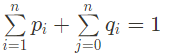

---------------------------
**EJEMPLO**

*ENTRADA* 

- Claves de busqueda = [10, 12, 20]
- Conteo de frecuencia = [34, 8, 50]

Clave: 10 / Frecuencia: 34
Clave: 12 / Frecuencia: 8
Clave: 20 / Frecuencia: 50

*PUEDE HABER LOS SIGUIENTES BST*








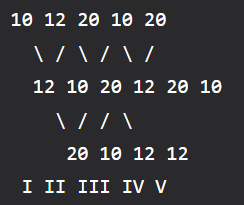

El costo del quinto BST es el mínimo.

Se multiplican las frecuencias de busquedas en el orden que quedaron las claves 20, 10, 12 :

***1 * 50 + 2 * 34 + 3 * 8***

Resultado = 142




3- **IMPLEMENTACIÓN DEL ALGORITMO**

- DE FORMA RECURSIVA

In [135]:
llamadas = 0

def BST_recursivo(frec, i, j, verbose):

  global llamadas                                                
  if j < i:                                                        
      return 0
  if j == i:     
    return frec[i]
  aux = 0                                                           
  for k in range(i, j + 1):
    aux += frec[k]
  if verbose:
    print("SUMA DE LAS FRECUANCIAS:", aux)   
  min = float("inf")                                                    
  for r in range(i, j + 1):                                         
    if verbose:
      print(f"CÁLCULO DE COSTOS MINIMOS: {frec[i:r-1]} y {frec[r+1:j]} ")
    llamadas += 2
    costo = (BST_recursivo(frec, i, r - 1, verbose) + BST_recursivo(frec, r + 1, j, verbose))
    if costo < min:
      if verbose:
        print(f"BUSQUEDA DEL MENOR : {min} y {costo} ")
      min = costo                                                       
  if verbose:
    print("-> COSTO MINIMO:", min+aux)
    print("\n")

  return min + aux

SUMA DE LAS FRECUANCIAS: 92
CÁLCULO DE COSTOS MINIMOS: [34, 8] y [8] 
SUMA DE LAS FRECUANCIAS: 58
CÁLCULO DE COSTOS MINIMOS: [] y [] 
BUSQUEDA DEL MENOR : inf y 50 
CÁLCULO DE COSTOS MINIMOS: [] y [] 
BUSQUEDA DEL MENOR : 50 y 8 
-> COSTO MINIMO: 66


BUSQUEDA DEL MENOR : inf y 66 
CÁLCULO DE COSTOS MINIMOS: [] y [] 
CÁLCULO DE COSTOS MINIMOS: [34] y [] 
SUMA DE LAS FRECUANCIAS: 42
CÁLCULO DE COSTOS MINIMOS: [34, 8] y [] 
BUSQUEDA DEL MENOR : inf y 8 
CÁLCULO DE COSTOS MINIMOS: [] y [] 
-> COSTO MINIMO: 50


BUSQUEDA DEL MENOR : 66 y 50 
-> COSTO MINIMO: 142


COSTO MINIMO: 142
LLAMADAS:  14




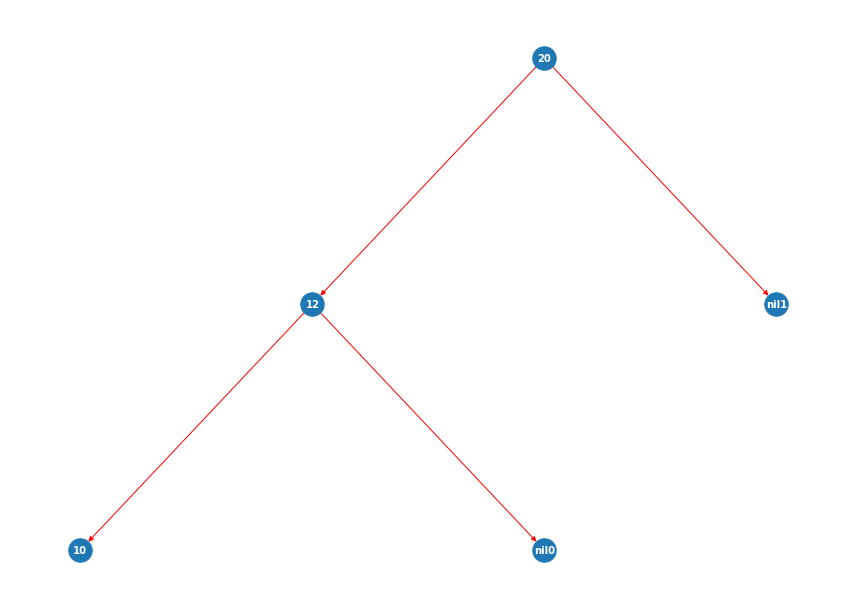

In [137]:
claves = [10, 12, 20]
frec = [34, 8, 50]
n = len(claves)
verbose = True

print("COSTO MINIMO:", BST_recursivo(frec,0, n-1, verbose))
print("LLAMADAS: ",llamadas)
print("\n")
llamadas = 0

T = nx.DiGraph()
generar_bst(T,claves)
pos = graphviz_layout(T, prog="dot")
nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width= 1.0, edge_color ="red")
null_node = 0

- DE FORMA DINÁMICA (bottom-up)

In [81]:
import random
import numpy as np

def BST(n):

    clave = sorted(random.sample(range(1, 100), n))
    arreglo = np.random.random(n*2+1)
    arreglo /= arreglo.sum()
    
    p = list(arreglo[:n]) 
    q = arreglo[n:] 
    return claves, p, q

In [83]:
import random
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

null_node = 0

def generar_bst(t,a):

    global null_node
    if len(a)==1: 
      T.add_node(a[0])
      return a[0]
    else:
      pivote = random.randint(0,len(a)-1)
      T.add_node(a[pivote])

      if pivote > 0:
        left_node = generar_bst(T,a[0:pivote])
        T.add_edge(a[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(a[pivote],"nil"+str(null_node)); null_node += 1
      
      if pivote < len(a)-1:
        right_node = generar_bst(t,a[pivote+1:])
        T.add_edge(a[pivote],right_node)
      else: 
        T.add_edge(a[pivote],"nil"+str(null_node)); null_node +=1

      return a[pivote]

In [134]:
cont = 0

def BST_dinamico(claves,frec,n,verbose):

  costo = [[0 for x in range(n)] for y in range(n)]                            
  global cont

  for i in range(n):                                                            
    costo[i][i] = frec[i]

  for l in range(2,n+1):
    for i in range(n - l+1):
      j = i + l - 1

      if verbose:
        print("-> CÁLCULO DE LAS FRECUENCIAS")
      suma = 0
      for k in range(i, j+1):                                                   
        suma += frec[k]

      if verbose:
        print("SUMA DE LAS FRECUANCIAS:",suma)

      if i >= n or j >=n:                                                       
        break
      costo[i][j] = float("inf")                                                

      for r in range(i,j+1):                                                    
        if verbose:
          print("-> BUSCANDO VALORES OPTIMOS")
        cont += 1
        aux = 0
        if r > i:
          if verbose:
            print(f"COMPARAMOS {r} - {i}")
          aux += costo[i][r-1]
          if verbose:
            print("COSTO MINIMO:", aux)
        if r < j:
          if verbose:
            print(f"COMPARAMOS {r+1} - {j}")
          aux += costo[r+1][j]
        aux += suma
        if verbose:
          print("NUEVO COSTO:" ,aux)
        if aux < costo[i][j]:
          costo[i][j] = aux

        if verbose:
          print("COSTO MINIMO:",costo[0][n-1])
          print("\n")

  return costo[0][n-1]
 

-> CÁLCULO DE LAS FRECUENCIAS
SUMA DE LAS FRECUANCIAS: 42
-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 1 - 1
NUEVO COSTO: 50
COSTO MINIMO: 0


-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 1 - 0
COSTO MINIMO: 34
NUEVO COSTO: 76
COSTO MINIMO: 0


-> CÁLCULO DE LAS FRECUENCIAS
SUMA DE LAS FRECUANCIAS: 58
-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 2 - 2
NUEVO COSTO: 108
COSTO MINIMO: 0


-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 2 - 1
COSTO MINIMO: 8
NUEVO COSTO: 66
COSTO MINIMO: 0


-> CÁLCULO DE LAS FRECUENCIAS
SUMA DE LAS FRECUANCIAS: 92
-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 1 - 2
NUEVO COSTO: 158
COSTO MINIMO: 158


-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 1 - 0
COSTO MINIMO: 34
COMPARAMOS 2 - 2
NUEVO COSTO: 176
COSTO MINIMO: 158


-> BUSCANDO VALORES OPTIMOS
COMPARAMOS 2 - 0
COSTO MINIMO: 50
NUEVO COSTO: 142
COSTO MINIMO: 142


COSTO : 142
LLAMADAS : 7 




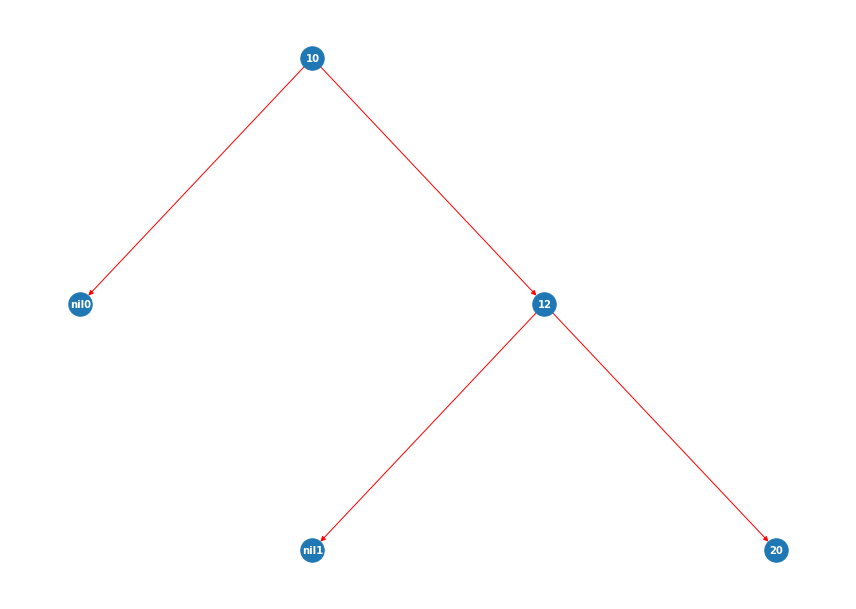

In [133]:
claves = [10, 12, 20]
frec = [34, 8, 50]
n = len(claves)
verbose = True

print(f"COSTO : {BST_dinamico(claves, frec, n, verbose)}")
print(f"LLAMADAS : {cont} " )
print("\n")
cont = 0

T = nx.DiGraph()
generar_bst(T,claves)

pos = graphviz_layout(T, prog="dot")

nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="red")
null_node = 0
     


--------------------------------------------


**4- PROPIEDADES DEL ALGORITMO**

CORRECTITUD

- **Dinámico (bottom_up)**:

Función para resolver el costo de los sub-problemas :









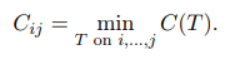

Función para resolver el costo total:


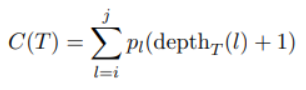

Relación de recurrencia:

Si
T = raiz, de i hasta j.

El costo de T sería:


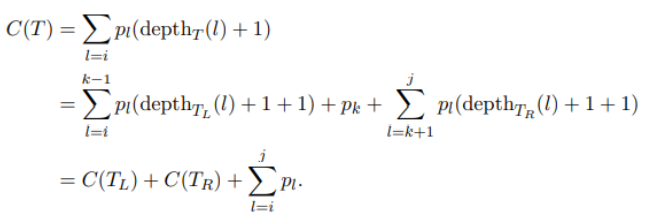

Función de recurrencia:


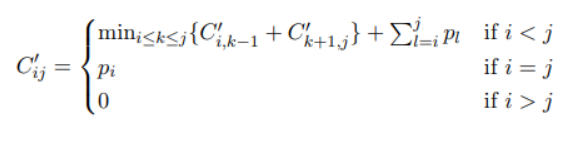

**Teorema:**

El algoritmo BST dinámico resuelve el problema para una secuencia de n claves y sus indices a1, a2... , ax.

**Prueba del teorema:**

1. *Inducción*

Caso base:

n = 0, no hay elementos en el sub-arbol.

j = i - 1

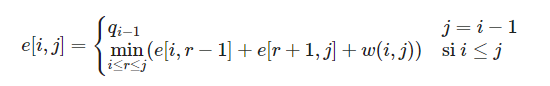

Caso inductivo:

Se asume que los problemas anteriores fueron resueltos de forma correcta. Por ello, se conoce el rango de índices y la raíz.

Se recorre cada raíz, calculando a través de los resultados que ya calculamos anteriormente, los valores que podrian ser el costo minímo del problema.


Al recorrer todas las raices posibles, se asegura que se encontrará el valor óptimo para el problema.

Para el problema original:

Se calcula: e[1,n] 

para todos los valores anteriormente calculados.



¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨

TIEMPO DE EJECUCIÓN
- **Recursivo**:

*Teorema*:
Bottom_up resuelve el problema en un tiempo de: ***O(n^3)***

*Prueba del teorema*:
Los sub-problemas se resuelven dentro de los:





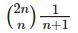

*Complejidad espacial:*

El algoritmo recursivo tiene una complejidad espacial de O(1), ya que no necesita almacenar información adicional al momentos de resolver los sub_problemas. 


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
- **Dinámico (bottom-up) :**

Función para resolver la cantidad de subproblemas de entrada: 

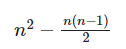

***n^2***: Total de espacios disponibles en una matriz.

***(n(n-1))/2***: Espacios que no se utilizan.

La forma dinámica guarda en la memoria los valores que calcula, asi resulve los sub_problemas solo una vez.

El algoritmo necesita tener tres ciclos for  que van hasta n , lo que nos da un tiempo de ejecucción de O(n^3).

*Complejidad espacial*:

El algortimo dinámico tiene como complejidad espacial de O(n^2), ya que las tres matrices que guardan la información, son de tamaño: (n+1)^2 , (n+1)^2 y n^2.
 

----------------
5- EXPERIMENTOS Y ANÁLISIS



Comparación algoritmos
(recursivo y dinámico)

In [140]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []
y2 = []

for n in range(1,16):
  claves = [10,20,12]
  frec = [34,8,50]
  n = len(claves)
  verbose = False

  t1 = repeat(setup="from __main__ import BST_recursivo", stmt=f"BST_recursivo({claves},{frec},{n},{verbose})", repeat = 1, number = 10)
  t2 = repeat(setup="from __main__ import BST_dinamico", stmt=f"BST_dinamico({claves},{frec},{n},{verbose})", repeat = 1, number = 10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["RECURSIVO", "DINÁMICO"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

TypeError: ignored

ANÁLISIS DEL GRÁFICO

Si bien no logré realizar el grafico, puedo deducir mediante lo estudiado que la forma recursiva del algoritmo deberia ser muy ineficiente mediante que aumentan los elementos, ya que va calculando una y otra vez los sub-problemas que ha calculado anteriormente.

En cambio, el algoritmo dinámico guarda los valores ya calculados.

Tiempo de ejecucción

DINÁMICO

In [142]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y2 = []

for n in range(1,16):
  claves,frec,n = BST(n)
  n = len(claves)
  verbose = False

  t2 = repeat(setup="from __main__ import BST_dinamico", stmt=f"BST_dinamico({claves},{frec},{n},{verbose})", repeat = 1, number = 10)

  x.append(n)
  y2.append(t2)

plt.plot(x,y2)

plt.legend(["DINÁMICO"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

IndexError: ignored

Tiempo de ejecución

RECURSIVO

In [143]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y2 = []

for n in range(1,16):
  claves,frec,n = BST(n)
  n = len(claves)
  verbose = False

  t2 = repeat(setup="from __main__ import BST_recursivo", stmt=f"BST_recursivo({claves},{frec},{n},{verbose})", repeat = 1, number = 10)

  x.append(n)
  y2.append(t2)

plt.plot(x,y2)

plt.legend(["OBST Dinámico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

TypeError: ignored

ANÁLISIS GENERAL 

Si seleccionamos el elemento con mayor probabilidad de ser buscado en la raiz, este cambio no produce un impacto tan grande al rendimiento del algoritmo, ya que si o si debe realizar las mismas iteraciones.